In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.api import AutoReg

In [5]:
tab1 = pd.read_csv("ipeadata[29-03-2023-09-53].csv",decimal=',',sep=";")

In [6]:
tab1.drop(tab1.columns[2], axis=1, inplace=True)

In [7]:
tab1.columns = ["Dia", "Dolar"]

In [8]:
tab1.index = tab1['Dia']
tab1.index = pd.to_datetime(tab1.index, format='%Y.%m')

<Axes: xlabel='Dia'>

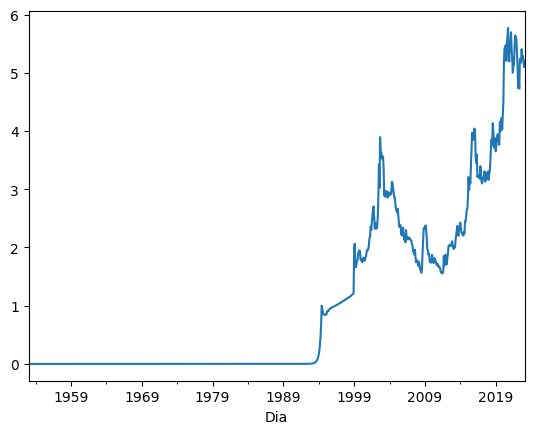

In [9]:
tab1['Dolar'].plot()

In [10]:
dolarLimpo = tab1.loc[tab1.index > pd.to_datetime('2000-01-01')]

<Axes: xlabel='Dia'>

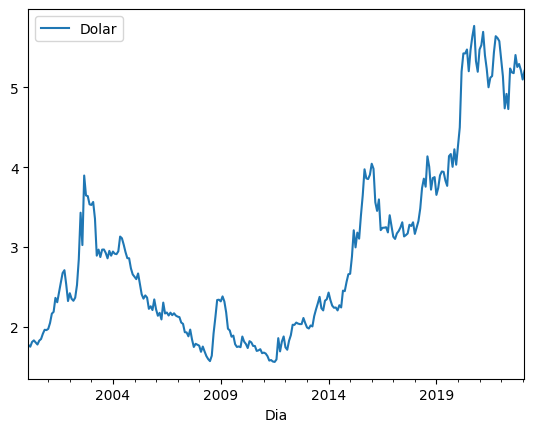

In [11]:
dolarLimpo.plot()

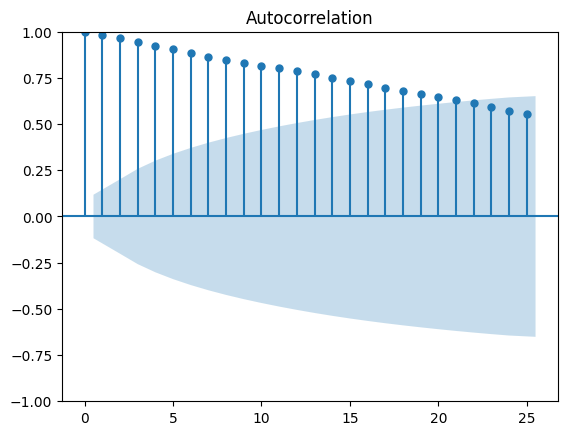

In [12]:
plot_acf(dolarLimpo['Dolar'])
plt.show()

In [14]:
autoc = acf(dolarLimpo['Dolar'], nlags=36)
autoc

array([1.        , 0.98176883, 0.96491667, 0.94484752, 0.92507613,
       0.90586917, 0.88528811, 0.86558721, 0.84730312, 0.82964872,
       0.81581816, 0.80086953, 0.78611681, 0.76835738, 0.75097868,
       0.7317408 , 0.71430779, 0.69542137, 0.67895462, 0.66321166,
       0.64805851, 0.63206658, 0.61412424, 0.59364994, 0.57286633,
       0.55349012, 0.5332957 , 0.51651745, 0.49859272, 0.47878688,
       0.46114179, 0.44287857, 0.42905098, 0.41347992, 0.39784112,
       0.38041285, 0.36507662])

In [16]:
corr = dolarLimpo['Dolar'].autocorr()
print(corr)

0.9905864268563853


In [17]:
y = dolarLimpo['Dolar'].values.reshape(-1, 1)

In [18]:
y

array([[1.7685],
       [1.7473],
       [1.8067],
       [1.8266],
       [1.8   ],
       [1.7748],
       [1.8234],
       [1.8437],
       [1.909 ],
       [1.9596],
       [1.9554],
       [1.9711],
       [2.0452],
       [2.1616],
       [2.1847],
       [2.36  ],
       [2.3049],
       [2.4313],
       [2.5517],
       [2.6713],
       [2.7071],
       [2.5287],
       [2.3204],
       [2.4183],
       [2.3482],
       [2.3236],
       [2.3625],
       [2.522 ],
       [2.8444],
       [3.4285],
       [3.0223],
       [3.8949],
       [3.645 ],
       [3.6365],
       [3.5333],
       [3.5258],
       [3.5632],
       [3.3531],
       [2.8898],
       [2.9656],
       [2.872 ],
       [2.9655],
       [2.9665],
       [2.9234],
       [2.8562],
       [2.9494],
       [2.8892],
       [2.9409],
       [2.9138],
       [2.9086],
       [2.9447],
       [3.1291],
       [3.1075],
       [3.0268],
       [2.9338],
       [2.8586],
       [2.8565],
       [2.7307],
       [2.6544

In [21]:
model = AutoReg(y, lags=2)

In [22]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  277
Model:                     AutoReg(2)   Log Likelihood                 116.478
Method:               Conditional MLE   S.D. of innovations              0.158
Date:                Fri, 31 Mar 2023   AIC                           -224.956
Time:                        09:30:30   BIC                           -210.489
Sample:                             2   HQIC                          -219.150
                                  277                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0238      0.026      0.912      0.362      -0.027       0.075
y.L1           0.9513      0.060     15.781      0.000       0.833       1.070
y.L2           0.0450      0.061      0.743      0.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


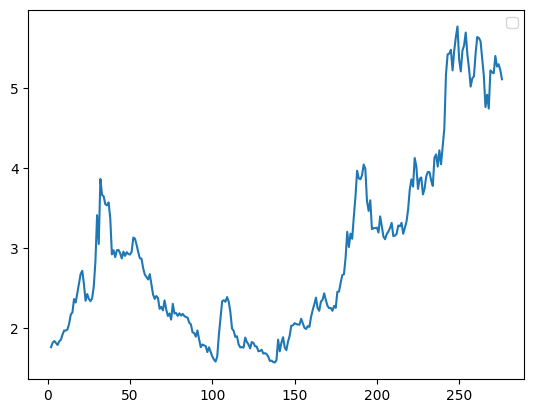

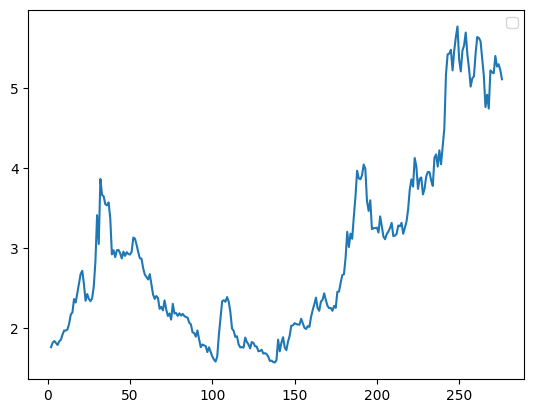

In [23]:
model_fit.plot_predict()